In [3]:
import copy, json, argparse
import torch
from scenario import Scenario
from agent import Agent
from dotdic import DotDic
import matplotlib.pyplot as plt
from main import create_agents, run_episodes, run_trial

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
path1 = 'Config/config_1.json'
path2 = 'Config/config_2.json'

In [4]:
sce = DotDic(json.load(open(path1, 'r')))
opt = DotDic(json.load(open(path2, 'r'))) 
scenario = Scenario(sce)
agents = create_agents(opt, sce, scenario, device)

In [5]:
Loc_MBS, Loc_PBS, Loc_FBS = scenario.BS_Location()

In [6]:
test_agent = Agent(opt, sce, scenario, 1, device)
print(next(test_agent.model_policy.parameters()).device)
print(next(test_agent.model_target.parameters()).device)

cuda:0
cuda:0


In [7]:
print(f"{len(Loc_MBS)} MBS")
print(f"{len(Loc_PBS)} PBS")
print(f"{len(Loc_FBS)} FBS")
print(f"{len(agents)} Users")

2 MBS
8 PBS
16 FBS
30 Users


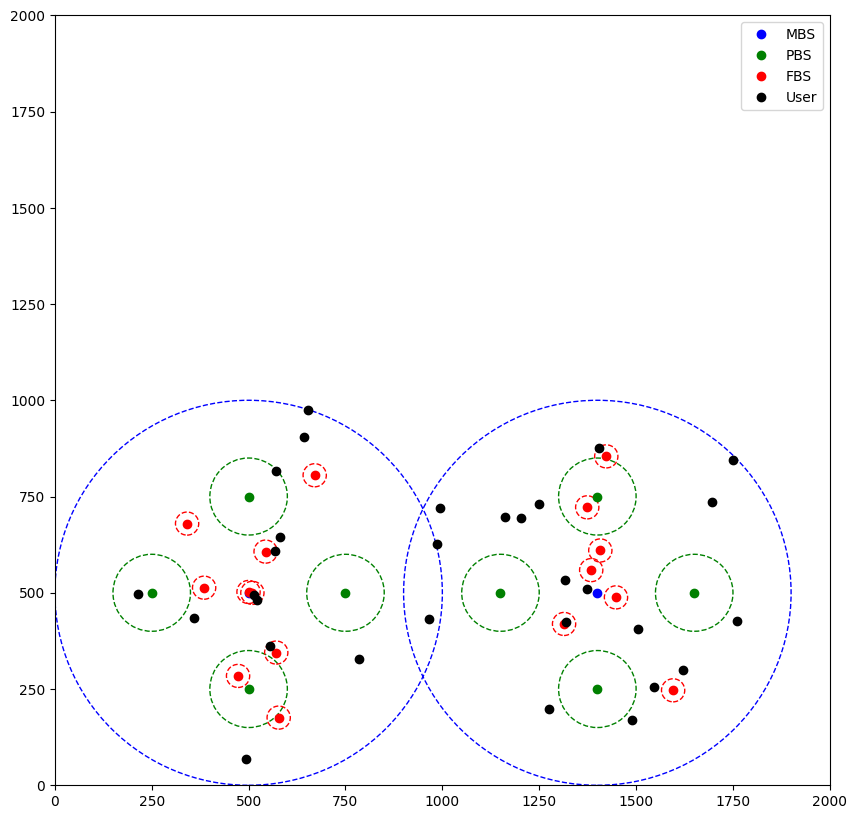

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
for loc in Loc_MBS:
    circle = plt.Circle((loc[0], loc[1]), sce.rMBS, color='blue', fill=False, linestyle='--')
    ax.add_artist(circle)
    plt.plot(loc[0], loc[1], 'bo', label='MBS' if 'MBS' not in ax.get_legend_handles_labels()[1] else "")
for loc in Loc_PBS:
    circle = plt.Circle((loc[0], loc[1]), sce.rPBS, color='green', fill=False, linestyle='--')
    ax.add_artist(circle)
    plt.plot(loc[0], loc[1], 'go', label='PBS' if 'PBS' not in ax.get_legend_handles_labels()[1] else "")
for loc in Loc_FBS:
    circle = plt.Circle((loc[0], loc[1]), sce.rFBS, color='red', fill=False, linestyle='--')
    ax.add_artist(circle)
    plt.plot(loc[0], loc[1], 'ro', label='FBS' if 'FBS' not in ax.get_legend_handles_labels()[1] else "")
for agent in agents:
    loc = agent.Get_Location().cpu()
    plt.plot(loc[0], loc[1], 'ko', label='User' if 'User' not in ax.get_legend_handles_labels()[1] else "")

ax.set_xlim(0, 2000)
ax.set_ylim(0, 2000)
ax.legend()

In [9]:
ntrials = 10

In [10]:
for i in range(ntrials):
        trial_result_path = None
        trial_opt = copy.deepcopy(opt)
        trial_sce = copy.deepcopy(sce)
        run_trial(trial_opt, trial_sce)

Episode Number: 0 Training Step: 432
Episode Number: 1 Training Step: 500
Episode Number: 2 Training Step: 500
Episode Number: 3 Training Step: 500
Episode Number: 4 Training Step: 368
Episode Number: 5 Training Step: 500
Episode Number: 6 Training Step: 447
Episode Number: 7 Training Step: 387
Episode Number: 8 Training Step: 318
Episode Number: 9 Training Step: 306
Episode Number: 10 Training Step: 285
Episode Number: 11 Training Step: 500
Episode Number: 12 Training Step: 500
Episode Number: 13 Training Step: 92
Episode Number: 14 Training Step: 500
Episode Number: 15 Training Step: 60
Episode Number: 16 Training Step: 500
Episode Number: 17 Training Step: 304
Episode Number: 18 Training Step: 142
Episode Number: 19 Training Step: 500
Episode Number: 20 Training Step: 205
Episode Number: 21 Training Step: 299
Episode Number: 22 Training Step: 500
Episode Number: 23 Training Step: 254
Episode Number: 24 Training Step: 278
Episode Number: 25 Training Step: 115
Episode Number: 26 Train

KeyboardInterrupt: 

AttributeError: 'DataFrame' object has no attribute 'episode'

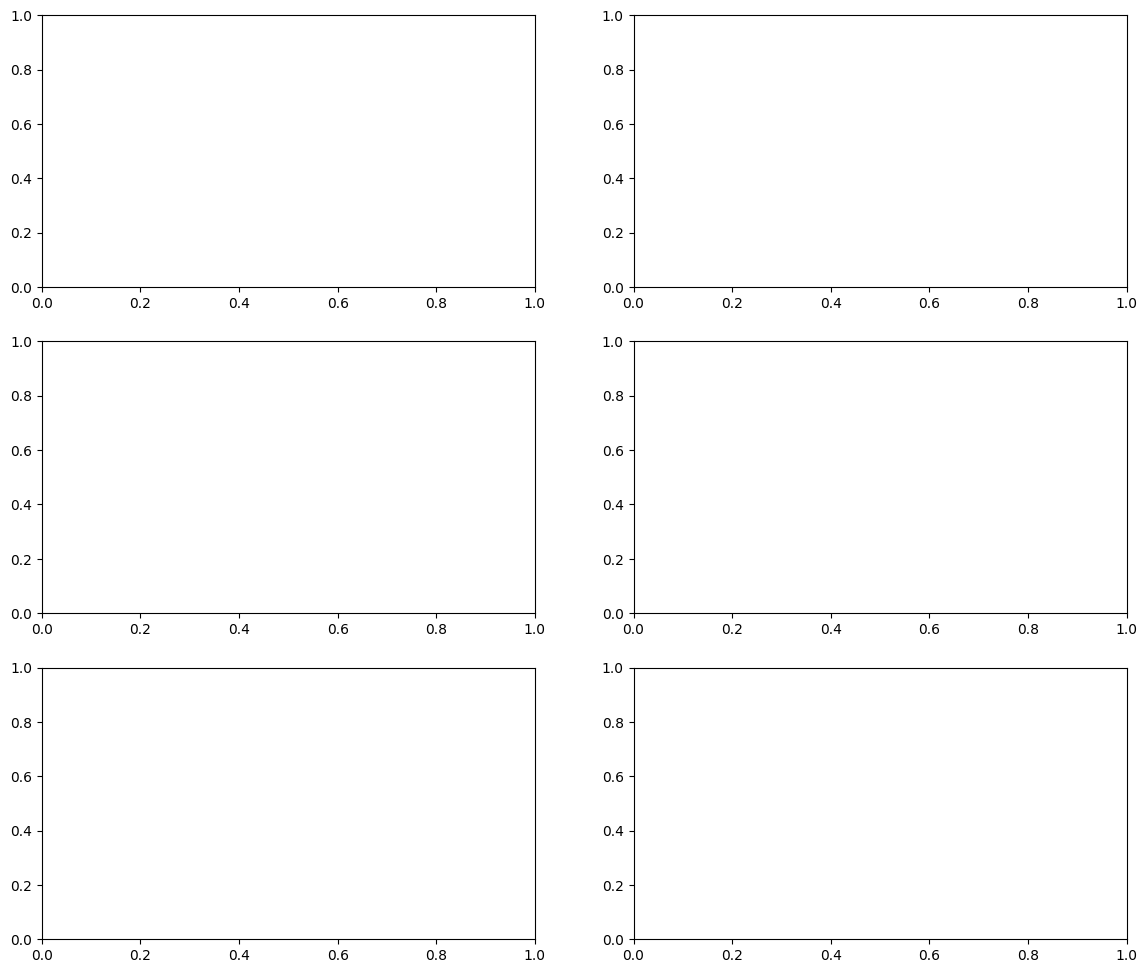

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

ddqn = pd.read_csv('Result/DDQN_500_QoS_0.csv')
# If you also have DQN_metrics.csv, load and add a column:
# dqn = pd.read_csv('Result/DQN_metrics.csv'); dqn['algo'] = 'DQN'; ddqn['algo'] = 'DDQN'; all_df = pd.concat([ddqn,dqn])

def smooth(x, w=20):
    return x.rolling(w, min_periods=1).mean()

fig, axes = plt.subplots(3,2, figsize=(14,12))
ax = axes[0,0]
ax.plot(ddqn.episode, ddqn.steps, alpha=0.3, label='steps')
ax.plot(ddqn.episode, smooth(ddqn.steps), label='steps (MA)')
ax.set_title('Episode Length'); ax.set_xlabel('Episode'); ax.set_ylabel('Steps'); ax.legend(); ax.grid(alpha=0.3)

ax = axes[0,1]
ax.plot(ddqn.episode, ddqn.mean_reward, alpha=0.3)
ax.plot(ddqn.episode, smooth(ddqn.mean_reward), label='reward (MA)', color='tab:green')
ax.set_title('Mean Reward per Episode'); ax.set_xlabel('Episode'); ax.set_ylabel('Reward'); ax.grid(alpha=0.3)

ax = axes[1,0]
ax.plot(ddqn.episode, ddqn.mean_loss, alpha=0.3, color='tab:red')
ax.plot(ddqn.episode, smooth(ddqn.mean_loss), label='loss (MA)', color='tab:red')
ax.set_title('Mean Loss'); ax.set_xlabel('Episode'); ax.set_ylabel('Huber Loss'); ax.grid(alpha=0.3)

ax = axes[1,1]
cum_success = ddqn.success.expanding().mean()
ax.plot(ddqn.episode, cum_success)
ax.set_title('Cumulative Success Rate'); ax.set_xlabel('Episode'); ax.set_ylabel('Success Rate'); ax.grid(alpha=0.3)

ax = axes[2,0]
ax.plot(ddqn.episode, ddqn.epsilon_final)
ax.set_title('Final Epsilon per Episode'); ax.set_xlabel('Episode'); ax.set_ylabel('Epsilon'); ax.grid(alpha=0.3)

ax = axes[2,1]
axes[2,1].scatter(ddqn.steps, ddqn.mean_reward, alpha=0.6)
axes[2,1].set_xlabel('Steps'); axes[2,1].set_ylabel('Mean Reward')
axes[2,1].set_title('Reward vs Steps')
axes[2,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()